In [2]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox,inv_boxcox
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
pred_accident = pd.read_csv('/content/drive/My Drive/AIT/Thesis/pred_accident.csv')

In [4]:
pred_accident.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


In [5]:
pred_accident_vc = pred_accident.drop(['Number_of_Casualties', 'Local_Authority_(Highway)', 'Casualty_Gender', 'Avg_Casualty_Age'], 
                              axis = 1).reset_index(drop = True)

In [6]:
pred_accident_vc.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


In [7]:
pred_accident_vc2 = pred_accident_vc.copy()

In [8]:
pred_accident_vc2['Number_of_Vehicles'].describe()

count    529103.000000
mean          1.843382
std           0.715782
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          37.000000
Name: Number_of_Vehicles, dtype: float64

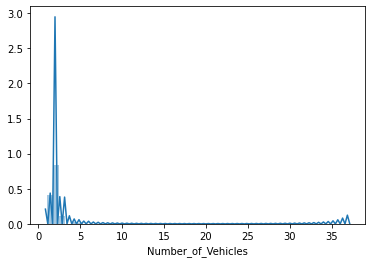

In [9]:
sns.distplot(pred_accident_vc2['Number_of_Vehicles'])

In [10]:
Counter(pred_accident_vc2['Number_of_Vehicles'])

Counter({1: 155480,
         2: 318946,
         3: 42038,
         4: 9371,
         5: 2181,
         6: 637,
         7: 256,
         8: 87,
         9: 51,
         10: 27,
         11: 9,
         12: 4,
         13: 3,
         14: 3,
         15: 1,
         16: 5,
         18: 1,
         23: 1,
         24: 1,
         37: 1})

In [11]:
#pred_accident_vc2 = pred_accident_vc2[pred_accident_vc2['Number_of_Vehicles'] < 8]

In [12]:
#Counter(pred_accident_vc2['Number_of_Vehicles'])

In [13]:
#sns.distplot(pred_accident_vc2['Number_of_Vehicles'])

In [14]:
# Function to calculate VIF
def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
    return(vif_df)

In [15]:
X = pred_accident_vc2.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Location_Easting_OSGR,30177.325586
1,Location_Northing_OSGR,136.437215
2,Longitude,2438.015706
3,Latitude,46029.860550
4,Police_Force,85.619236
5,Accident_Severity,46.086223
6,Number_of_Vehicles,8.050113
7,Day_of_Week,5.571854
8,Local_Authority_(District),94.563115
9,1st_Road_Class,12.839655


In [16]:
pred_accident_vc2 = pred_accident_vc2.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)'], 
                                      axis = 1)

In [17]:
pred_accident_vc3 = pd.get_dummies(pred_accident_vc2, columns= ['Police_Force', 'Accident_Severity', 'Day_of_Week',
                                                                '1st_Road_Class', 'Road_Type', 'Junction_Detail',
                                                                'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                                                                'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                                                                'Weather_Conditions', 'Road_Surface_Conditions',
                                                                'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                                                'Urban_or_Rural_Area'])

In [18]:
X = pred_accident_vc3.drop(['Number_of_Vehicles'], axis = 1)
y = pred_accident_vc3['Number_of_Vehicles']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Linear regression using OLS method
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Number_of_Vehicles   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:18:31   Log-Likelihood:            -3.8734e+05
No. Observations:              370372   AIC:                         7.749e+05
Df Residuals:                  370233   BIC:                         7.765e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
1st_Road_Number                             -7.89e-06   8.09e-07     -9.748      0.000   -9.48e-06    -6.3e-06
Speed_limit                                    0.0032      0.000     24.274      0.000       0.003       0.004
2nd_Road_Number                             1.862e-06   1.19e-06      1.567      0.117   -4.66e-07    4.19e-06
Hour                                           0.0033      0.000     14.568      0.000       0.003       0.004
Min                                            0.0004   6.47e-05      6.318      0.000       0.000       0.001
Police_Force_1                                -0.0489      0.004    -12.196      0.000      -0.057      -0.041
Police_Force_3                                -0.0309      0.012     -2.647      0.008      -0.054      -0.008
Police_Force_4                                 0.0062      0.007      0.847      0.397      -0.008       0.021
Police_Force_5                                 0.0009      0.009      0.100      0.921      -0.016       0.018
Police_Force_6                                 0.0168      0.008      2.236      0.025       0.002       0.032
Police_Force_7                                 0.0055      0.009      0.616      0.538      -0.012       0.023
Police_Force_10                               -0.0173      0.008     -2.104      0.035      -0.033      -0.001
Police_Force_11                                0.0071      0.013      0.551      0.582      -0.018       0.032
Police_Force_12                               -0.0370      0.010     -3.837      0.000      -0.056      -0.018
Police_Force_13                                0.0091      0.006      1.405      0.160      -0.004       0.022
Police_Force_14                                0.0348      0.008      4.343      0.000       0.019       0.050
Police_Force_16                                0.0114      0.009      1.307      0.191      -0.006       0.029
Police_Force_17                                0.0118      0.015      0.792      0.428      -0.017       0.041
Police_Force_20                                0.0686      0.006     11.353      0.000       0.057       0.080
Police_Force_21                                0.0887      0.009      9.631      0.000       0.071       0.107
Police_Force_22                                0.0309      0.009      3.388      0.001       0.013       0.049
Police_Force_23                                0.0473      0.011      4.205      0.000       0.025       0.069
Police_Force_30                                0.0370      0.010      3.752      0.000       0.018       0.056
Police_Force_31                                0.0087      0.008      1.028      0.304      -0.008       0.025
Police_Force_32                               -0.0832      0.010     -8.729      0.000

In [21]:
y_pred = reg_OLS.predict(X_test)

In [22]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,2.0
230130,1,2.0
384671,2,2.0
345447,1,2.0
86197,2,2.0
82456,1,2.0
184511,2,2.0
499836,1,2.0
123737,1,2.0
43331,2,2.0


In [23]:
pred_df.tail(10)

,Actual,Predicted
493959,2,2.0
161062,2,2.0
480185,2,2.0
484181,1,2.0
420179,2,2.0
339352,3,2.0
459,2,2.0
424188,1,2.0
38048,2,1.0
368957,2,2.0


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.4755184934975322
Mean Squared Error: 0.4747045747057034
Root Mean Squared Error: 0.6889880802348495
R2 Score: 0.07413426761077235


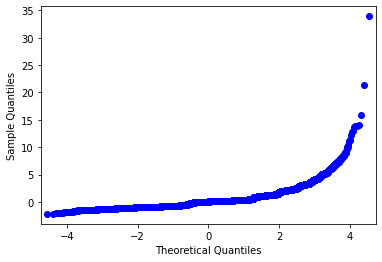

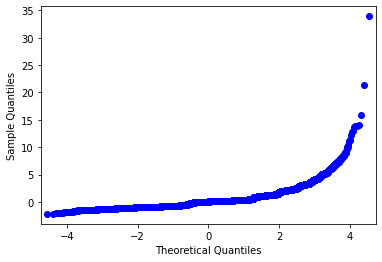

In [25]:
qqplot(reg_OLS.resid)

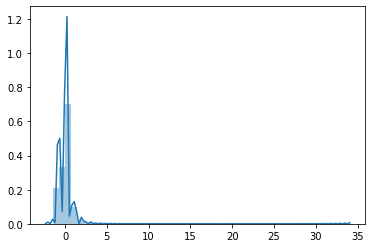

In [26]:
sns.distplot(reg_OLS.resid)

In [27]:
Counter(np.round(y_pred,0))

Counter({1.0: 5785, 2.0: 152690, 3.0: 256})

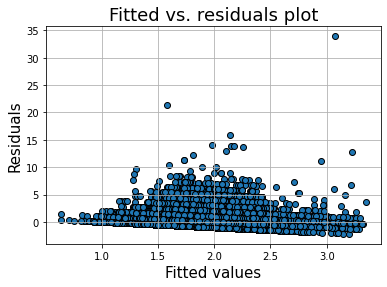

In [28]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

In [29]:
pred_accident_vc2.head(5)

,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,1,3,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,1,3,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,1,3,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,1,3,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,1,2,2,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


In [30]:
X = pred_accident_vc2.drop(['Number_of_Vehicles'], axis = 1)
y = pred_accident_vc2['Number_of_Vehicles']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
y_pred = reg_rf.predict(X_test)

In [34]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,2.0
230130,1,2.0
384671,2,2.0
345447,1,3.0
86197,2,2.0
82456,1,2.0
184511,2,2.0
499836,1,1.0
123737,1,2.0
43331,2,2.0


In [35]:
Counter(np.round(y_pred,0))

Counter({1.0: 16774,
         2.0: 137513,
         3.0: 4288,
         4.0: 137,
         5.0: 13,
         6.0: 2,
         7.0: 3,
         9.0: 1})

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.493435377470996
Mean Squared Error: 0.49337587156360213
Root Mean Squared Error: 0.702407197830149
R2 Score: 0.037717694312079386


In [38]:
# KNN Regressor
#rmse_val = [] #to store rmse values for different k
#k = [50, 100, 150, 200, 250, 300]
#for K in k:
#    model = KNeighborsRegressor(n_neighbors = K)
#    model.fit(X_train, y_train)  #fit the model
#    pred=model.predict(X_test) #make prediction on test set
#    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  50 is: 0.7011246917118832
RMSE value for k=  100 is: 0.6997427421906584
RMSE value for k=  150 is: 0.6997063733726117
RMSE value for k=  200 is: 0.6999461800162416
RMSE value for k=  250 is: 0.7002063531067354
RMSE value for k=  300 is: 0.7005043586775963


In [39]:
# k = 150 is selected since rmse is lowest
reg_knn = KNeighborsRegressor(n_neighbors = 150)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=150, p=2,
                    weights='uniform')

In [40]:
y_pred = reg_knn.predict(X_test)

In [43]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,2.0
230130,1,2.0
384671,2,2.0
345447,1,2.0
86197,2,2.0
82456,1,2.0
184511,2,2.0
499836,1,2.0
123737,1,2.0
43331,2,2.0


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.48830721997173415
Mean Squared Error: 0.48958900893825263
Root Mean Squared Error: 0.6997063733726117
R2 Score: 0.04510360657182588
